### Forecasting

In [1]:
# @title import
import pandas as pd
import os
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

In [2]:
# @title gdrive mount
drive.mount('/content/gdrive/', force_remount=True)
gdrive_path = '/content/gdrive' + '/My Drive/ked/'
os.chdir(gdrive_path)
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Mounted at /content/gdrive/
Files in '/content/gdrive/My Drive/ked': ['augusta.csv', 'cleveland.csv', 'youngstown.csv']


In [3]:
# @title center data

augusta = pd.read_csv('augusta.csv', parse_dates=True)
augusta['date'] = pd.to_datetime(augusta['date'], format='%Y%m')
augusta.head(10)

,date,total donor,new donor,total return donor,return donor,month donor,total unit,new unit,total return unit,return unit,month unit
0,2019-01-01,664,159,505,485,20,3079,483,2596,2540,56
1,2019-02-01,606,112,494,459,35,2558,309,2249,2164,85
2,2019-03-01,518,95,423,387,36,2233,246,1987,1899,88
3,2019-04-01,576,131,445,379,66,2531,396,2135,1953,182
4,2019-05-01,681,190,491,422,69,3105,580,2525,2325,200
5,2019-06-01,813,245,568,515,53,3303,736,2567,2412,155
6,2019-07-01,951,285,666,589,77,3980,864,3116,2890,226
7,2019-08-01,995,283,712,647,65,4141,867,3274,3089,185
8,2019-09-01,953,214,739,657,82,3700,635,3065,2868,197
9,2019-10-01,1025,269,756,664,92,4223,790,3433,3141,292


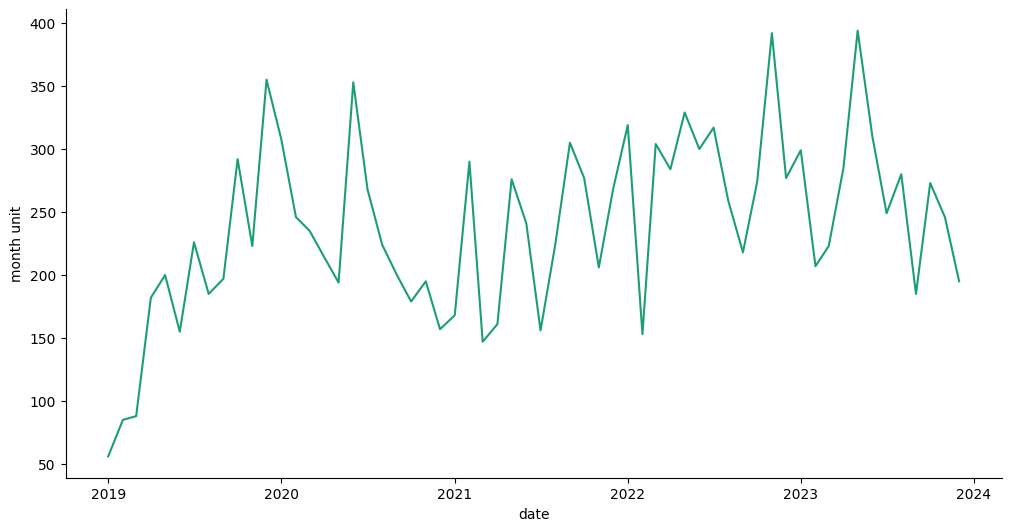

In [4]:
# @title date vs month unit

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['month unit']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = augusta.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('month unit')

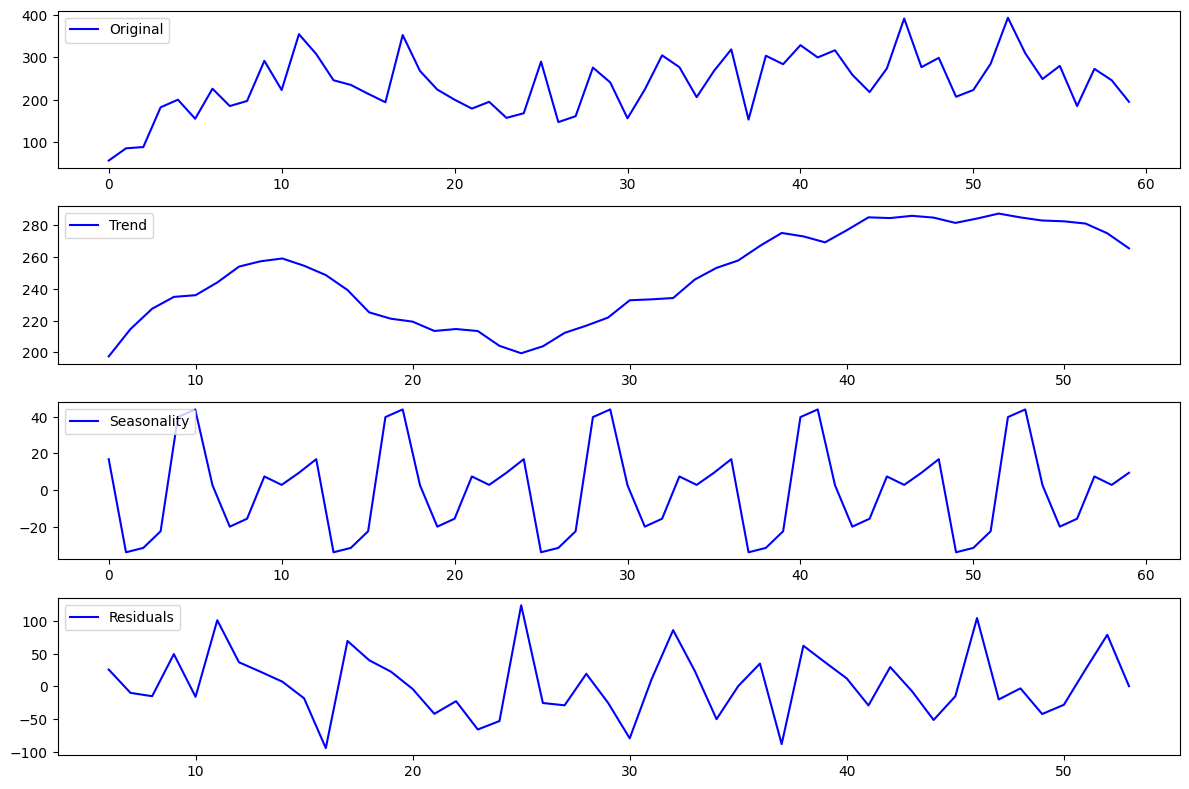

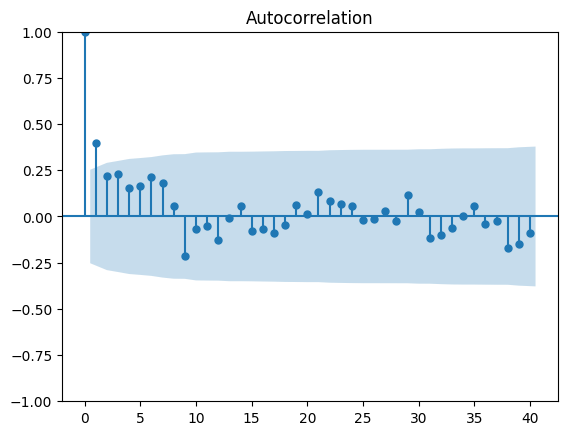

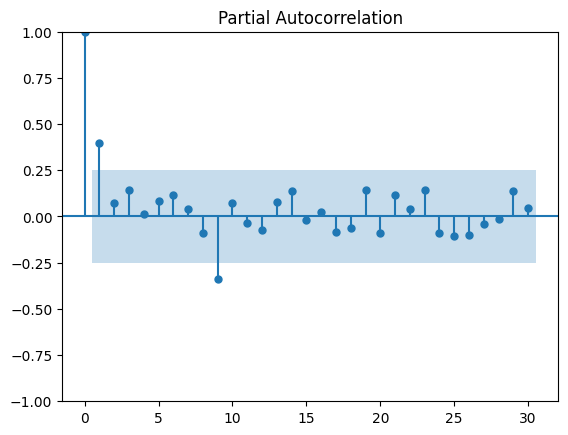

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


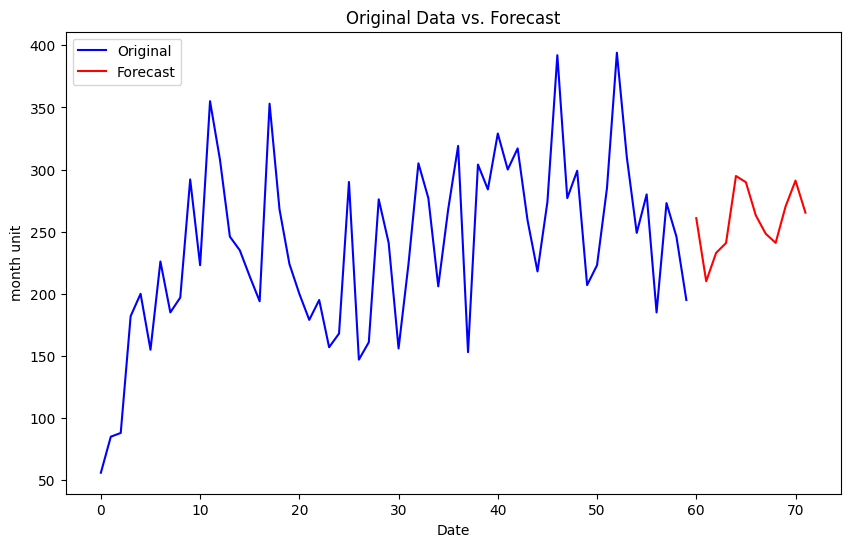

Root Mean Squared Error (RMSE): 45.7139991458437


In [5]:
# @title SARIMA model

# Decompose the time series to visualize trend, seasonality, and residuals
decomposition = seasonal_decompose(augusta['month unit'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(augusta['month unit'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()

# Plot ACF and PACF plots to determine model parameters
plot_acf(augusta['month unit'], lags=40)
plot_pacf(augusta['month unit'], lags=30)
plt.show()

# Define the SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal order
model = SARIMAX(augusta['month unit'], order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
results = model.fit()

# Forecast
forecast = results.forecast(steps=12)  # Specify the number of steps to forecast

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
augusta['month unit'].plot(label='Original', color='blue')
forecast.plot(label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('month unit')
plt.title('Original Data vs. Forecast')
plt.legend(loc='upper left')
plt.show()

# Evaluate the model
print("Root Mean Squared Error (RMSE):", rmse(augusta['month unit'][-12:], forecast))